In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_val_folder = "C:/Users/91944/Desktop/charts/train_val"
test_folder = "C:/Users/91944/Desktop/charts/test"
train_path_labels = "C:/Users/91944/Desktop/charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [5]:
train_images = []
train_labels = []
for filename in os.listdir(train_val_folder):
    if filename.endswith('.png'):
# Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_folder, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # img = Image.open(os.path.join(train_val_folder, filename))
        img_array = np.array(img)
    # Append the array to the list of images
        train_images.append(img_array)
        train_labels.append(filename)


In [6]:
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
np.save('x_train.npy', train_images)
np.save('y_train.npy', train_labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_train.shape
x_train[:5]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [11]:
test_images = []
test_labels = []
for filename in os.listdir(test_folder):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(test_folder, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        test_images.append(img_array)
        test_labels.append(filename)

In [12]:
le = LabelEncoder()
test_labels = le.fit_transform(test_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [13]:
np.save('x_test.npy', test_images)
np.save('y_test.npy', test_labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [14]:
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

'line'

In [15]:
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
x_train=x_train /255
x_test=x_train /255
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
cnn_mod = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])

In [25]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 0.5717 - accuracy: 0.7828 - val_loss: 2.5387 - val_accuracy: 0.3625
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 2.1167 - accuracy: 0.3375 - val_loss: 1.3084 - val_accuracy: 0.4313
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 0.8839 - accuracy: 0.6031 - val_loss: 1.2653 - val_accuracy: 0.5688
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 0.7904 - accuracy: 0.6766 - val_loss: 1.5073 - val_accuracy: 0.4938
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.0045 - accuracy: 0.5938 - val_loss: 1.4368 - val_accuracy: 0.5437
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 0.9550 - accuracy: 0.6500 - val_loss: 1.3798 - val_accuracy: 0.5063
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 0.8934 - accuracy: 0.6906 - val_loss: 1.3159 - val_accuracy: 0.4938
Epoch 8/50
1/1 [=========================

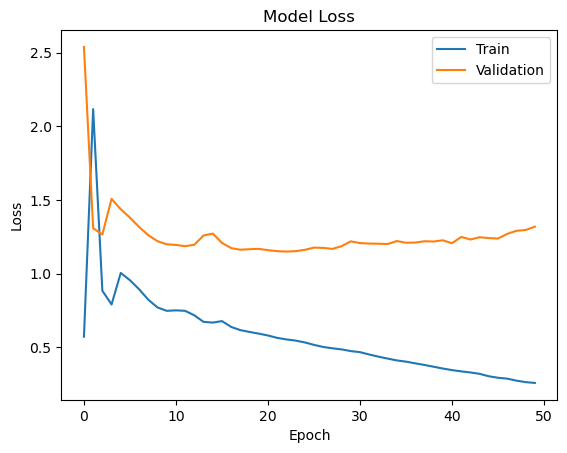

5/5 [==============================] - 0s 43ms/step - loss: 1.3184 - accuracy: 0.6125


In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
cnn_model.evaluate(x_test,y_test)
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])

5/5 [==============================] - 0s 44ms/step


array([4, 3, 2, 4, 4])

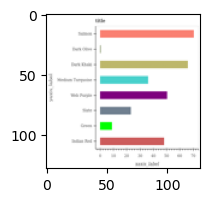

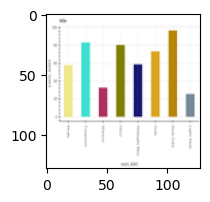

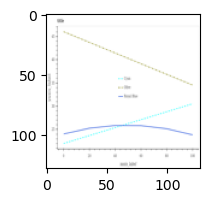

In [30]:

image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
y_pred = cnn_model.predict(x_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

y_test[:5]

'vbar_categorical'

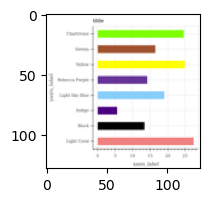

In [31]:
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]]

In [32]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        40
           1       0.73      0.85      0.79        26
           2       0.45      0.32      0.38        31
           3       0.61      0.57      0.59        35
           4       0.68      0.68      0.68        28

    accuracy                           0.61       160
   macro avg       0.61      0.62      0.61       160
weighted avg       0.60      0.61      0.60       160



Confusion Matrix:
[[27  4  1  2  6]
 [ 2 22  0  2  0]
 [12  1 10  8  0]
 [ 1  0 11 20  3]
 [ 5  3  0  1 19]]


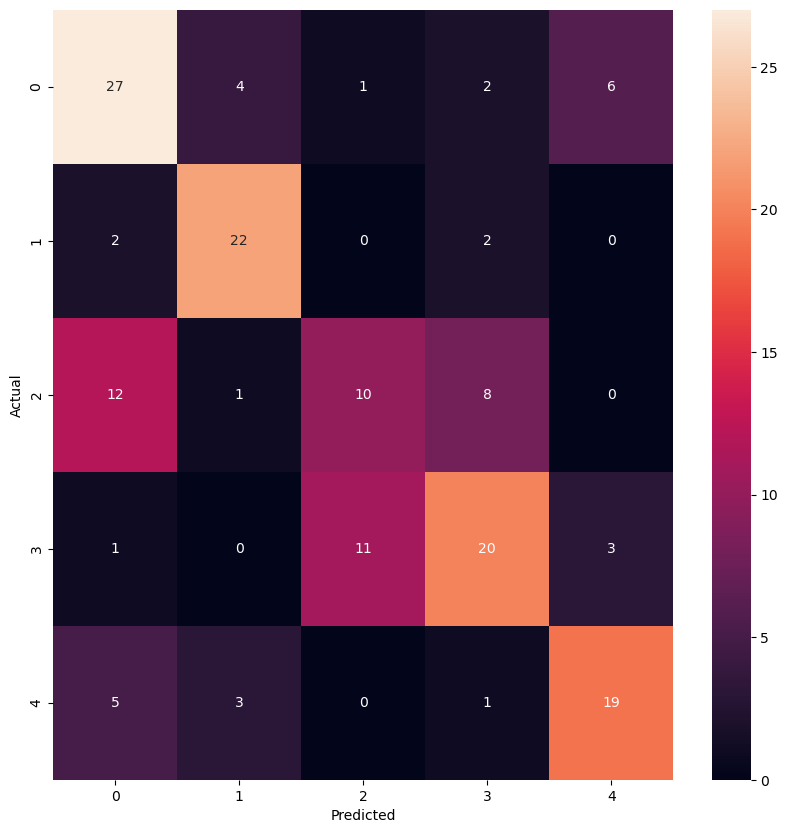

In [33]:
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)
 #Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [36]:
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)
for layer in pt_model.layers:
 layer.trainable = False

In [37]:
pt_model.summary()
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

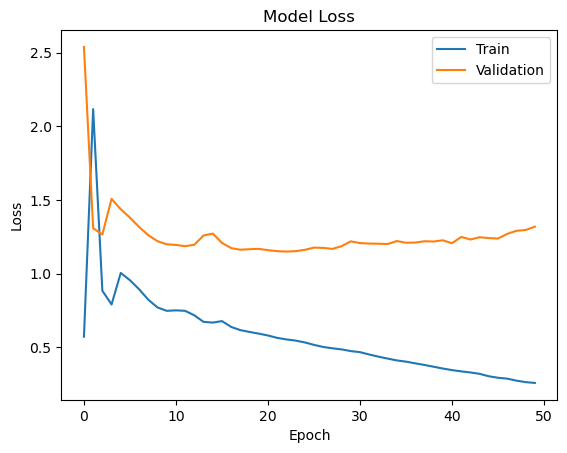

In [38]:
train_gen = train_datagen.flow(x_train, y_train, batch_size=32)
test_gen = train_datagen.flow(x_test, y_test, batch_size=32)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()